# 1. 파이썬을 이용한 TF-IDF 행렬 구현

In [1]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

In [2]:
# 4개의 문서
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 

# vocab 구축
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [3]:
print(vocab)

['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']


In [4]:
# 총 문서의 수
N = len(docs)
print('총 문서의 수', N)

총 문서의 수 4


TF, IDF, 그리고 TF-IDF 값을 구하는 함수를 구현합니다.



In [5]:
# TF를 구하는 함수
def tf(t, d):
  return d.count(t)

In [6]:
# IDF를 구하는 함수
def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df+1))

In [7]:
# TF와 IDF의 값을 곱하는 함수
def tfidf(t, d):
  return tf(t,d)* idf(t)

TF를 구해보겠습니다. 다시 말해 DTM을 데이터프레임에 저장하여 출력해보겠습니다.



In [8]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    # tf 함수를 호출 : TF 값을 계산
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)

In [9]:
# TF. 즉, DTM 출력
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


정상적으로 DTM이 출력되었습니다. 각 단어에 대한 IDF 값을 구해봅시다.



In [10]:
result = []

# 각 단어에 대해서 idf값을 계산
for j in range(len(vocab)):
    t = vocab[j]
    # idf 함수를 호출 : IDF 값을 계산
    result.append(idf(t))

# IDF 출력
idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


TF-IDF 행렬을 출력해봅시다.

In [11]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    # tfidf 함수를 호출 : TF-IDF 값 계산
    result[-1].append(tfidf(t,d))

# TF-IDF 행렬
tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


TF-IDF의 가장 기본적인 식에 대해서 학습하고 실제로 구현하는 실습을 진행해보았습니다. 사실 실제 TF-IDF 구현을 제공하고 있는 많은 머신 러닝 패키지들은 패키지마다 식이 조금씩 상이하지만, 위에서 배운 식과는 다른 조정된 식을 사용합니다. 아래에서 실습할 사이킷런의 TF-IDF 구현체 또한 위의 식에서 조정된 식을 사용하고 있습니다.

# 2. 사이킷런을 이용한 DTM과 TF-IDF 실습

사이킷런을 통해 DTM과 TF-IDF를 만들어보겠습니다. CountVectorizer를 사용하면 DTM을 만들 수 있습니다.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(corpus).toarray())

# 각 단어와 맵핑된 인덱스 출력
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


DTM이 완성되었습니다. DTM에서 각 단어의 인덱스가 어떻게 부여되었는지를 확인하기 위해, 인덱스를 확인해보았습니다. 첫번째 열의 경우에는 0의 인덱스를 가진 do입니다. do는 세번째 문서에만 등장했기 때문에, 세번째 행에서만 1의 값을 가집니다. 두번째 열의 경우에는 1의 인덱스를 가진 know입니다. know는 첫번째 문서에만 등장했으므로 첫번째 행에서만 1의 값을 가집니다.

사이킷런은 TF-IDF를 자동 계산해주는 TfidfVectorizer를 제공합니다. 사이킷런의 TF-IDF는 위에서 배웠던 보편적인 TF-IDF 기본 식에서 조정된 식을 사용합니다. 요약하자면, IDF의 로그항의 분자에 1을 더해주며, 로그항에 1을 더해주고, TF-IDF에 L2 정규화라는 방법으로 값을 조정하는 등의 차이로 TF-IDF가 가진 의도는 여전히 그대로 갖고 있습니다.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


DTM, TF-IDF에 대해서 전부 학습했습니다. 문서들 간의 유사도를 구하기 위한 재료 손질하는 방법을 배운 셈입니다. 유사도를 구하는 방식으로는 일반적으로 내적(dot-product)나 코사인 유사도(cosine similarity)가 있습니다.

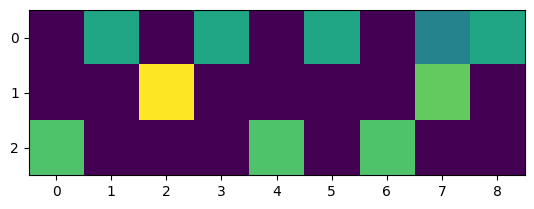

In [19]:
plt.imshow(tfidfv.transform(corpus).toarray());

# 4. 코사인 유사도

<img src="https://assets.website-files.com/6141c89a3874c3702674a1c0/648086c56d3337483be42e7f_cosine-similarity.png">

https://wikidocs.net/24603

코사인 유사도는 유사도가 -1 ~ 1 사이의 값을 가지는 유사도 계산 방법입니다.

In [14]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
doc1 = np.array([[0,1,1,1]])
doc2 = np.array([[1,0,1,1]])
doc3 = np.array([[2,0,2,2]])

print('문서 1과 문서2의 유사도 :',cosine_similarity(doc1, doc2))
print('문서 1과 문서3의 유사도 :',cosine_similarity(doc1, doc3))
print('문서 2와 문서3의 유사도 :',cosine_similarity(doc2, doc3))

문서 1과 문서2의 유사도 : [[0.66666667]]
문서 1과 문서3의 유사도 : [[0.66666667]]
문서 2와 문서3의 유사도 : [[1.]]


눈여겨볼만한 점은 문서1과 문서2의 코사인 유사도와 문서1과 문서3의 코사인 유사도가 같다는 점과 문서2와 문서3의 코사인 유사도가 1이 나온다는 것입니다. 앞서 1은 두 벡터의 방향이 완전히 동일한 경우에 1이 나오며, 코사인 유사도 관점에서는 유사도의 값이 최대임을 의미한다고 언급한 바 있습니다.

문서3은 문서2에서 단지 모든 단어의 빈도수가 1씩 증가했을 뿐입니다. 다시 말해 한 문서 내의 모든 단어의 빈도수가 동일하게 증가하는 경우에는 기존의 문서와 코사인 유사도의 값이 1이라는 것입니다. 이것이 시사하는 점은 무엇일까요? 예를 들어보겠습니다. 문서 A와 B가 동일한 주제의 문서. 문서 C는 다른 주제의 문서라고 해봅시다. 그리고 문서 A와 문서 C의 문서의 길이는 거의 차이가 나지 않지만, 문서 B의 경우 문서 A의 길이보다 두 배의 길이를 가진다고 가정하겠습니다. 이런 경우 유클리드 거리로 유사도를 연산하면 문서 A가 문서 B보다 문서 C와 유사도가 더 높게 나오는 상황이 발생할 수 있습니다. 이는 유사도 연산에 문서의 길이가 영향을 받았기 때문인데, 이런 경우 코사인 유사도가 해결책이 될 수 있습니다. 코사인 유사도는 유사도를 구할 때 벡터의 방향(패턴)에 초점을 두므로 코사인 유사도는 문서의 길이가 다른 상황에서 비교적 공정한 비교를 할 수 있도록 도와줍니다.

# 이제 한국어 뉴스 데이터셋으로 뉴스들 사이의 유사도를 구해보세요!

뉴스 데이터셋 - https://core.today/g/a0U1R29/c/M2dyhL492cp1o/f3V0jJ04y2?keyword=%EB%89%B4%EC%8A%A4&page=1

# 과제 1.
대량의 벡터들(행렬)의 유사도를 계산할 때는 다음 주소를 참고하여 출력해 보세요.

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html

# 과제 2. 계산한 유사도를 이용하여 다음과 같은 그림 A를 그려보세요. (matplotlib, seaborn, plotly 등 활용)
<img src="https://www.researchgate.net/publication/350127817/figure/fig2/AS:1002593178378241@1616048249198/A-Cosine-similarity-matrix-for-KE1-seed-genes-B-Network-plot-established-from-the.png">

- https://www.researchgate.net/figure/A-Cosine-similarity-matrix-for-KE1-seed-genes-B-Network-plot-established-from-the_fig2_350127817